In [9]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [11]:
data = pd.read_csv('sim_log_KSC_52.5_1000.csv')

data['time'] = data['time'] - data['time'][0]

data.head()

step  time         alt        speed        hdot        range     az_err  \
0     1     0  121.993000  7830.900409 -126.490252  9512.418737  11.080930   
1     2     2  121.740001  7831.187983 -126.509082  9512.418820  11.061364   
2     3     4  121.486964  7831.475172 -126.527095  9497.891978  11.067085   
3     4     6  121.233893  7831.761963 -126.544287  9483.364284  11.072866   
4     5     8  120.980788  7832.048340 -126.560653  9468.836079  11.078705   

         lat        long  pitch  roll  unl_roll  roll_ref       l_d      drag  \
0 -29.519353 -146.455887   40.0   0.0       0.0       0.0  0.251395  0.008842   
1 -29.420560 -146.353257   40.0   0.0       0.0       0.0  0.251971  0.009065   
2 -29.321669 -146.250831   40.0   0.0       0.0       0.0  0.252708  0.009288   
3 -29.222680 -146.148612   40.0   0.0       0.0       0.0  0.253479  0.009519   
4 -29.123591 -146.046603   40.0   0.0       0.0       0.0  0.254282  0.009755   

   drag_ref  entry_phase  Unnamed: 17  
0       0.0            1          NaN  
1       0.0            1          NaN  
2       0.0            1          NaN  
3       0.0            1          NaN  
4       0.0            1          NaN

In [12]:
import plotly.graph_objects as go
from math import log2, radians, cos, sqrt


# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data['long'],
    lat=data['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data['alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data['alt'].min(),
        cmax=data['alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Az err: %{customdata}<extra></extra>',
    text=data['alt'],
    customdata=data['az_err']
)

center_lat = (data['lat'].min() + data['lat'].max()) / 2
center_lon = (data['long'].min() + data['long'].max()) / 2


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,
    
        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),
        
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)


# Display the figure
fig.show()

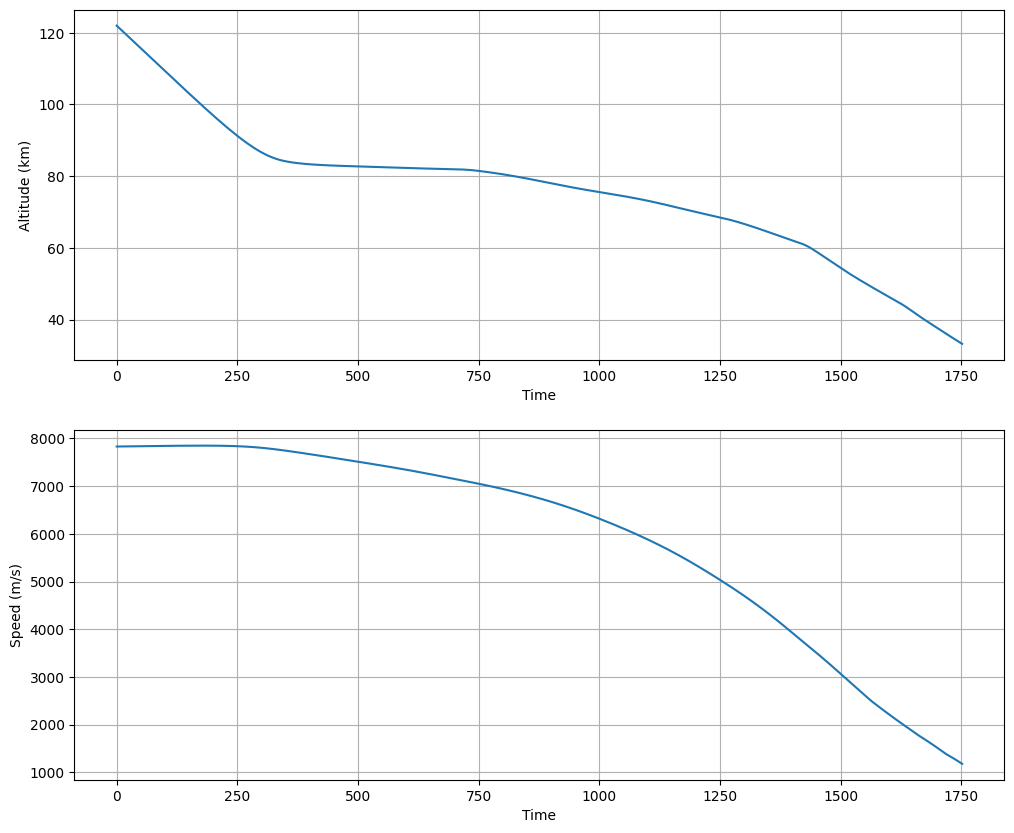

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['time'], data['alt'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_ = ax[1]
plt_.plot(data['time'], data['speed'])
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()




-85.62180345721501


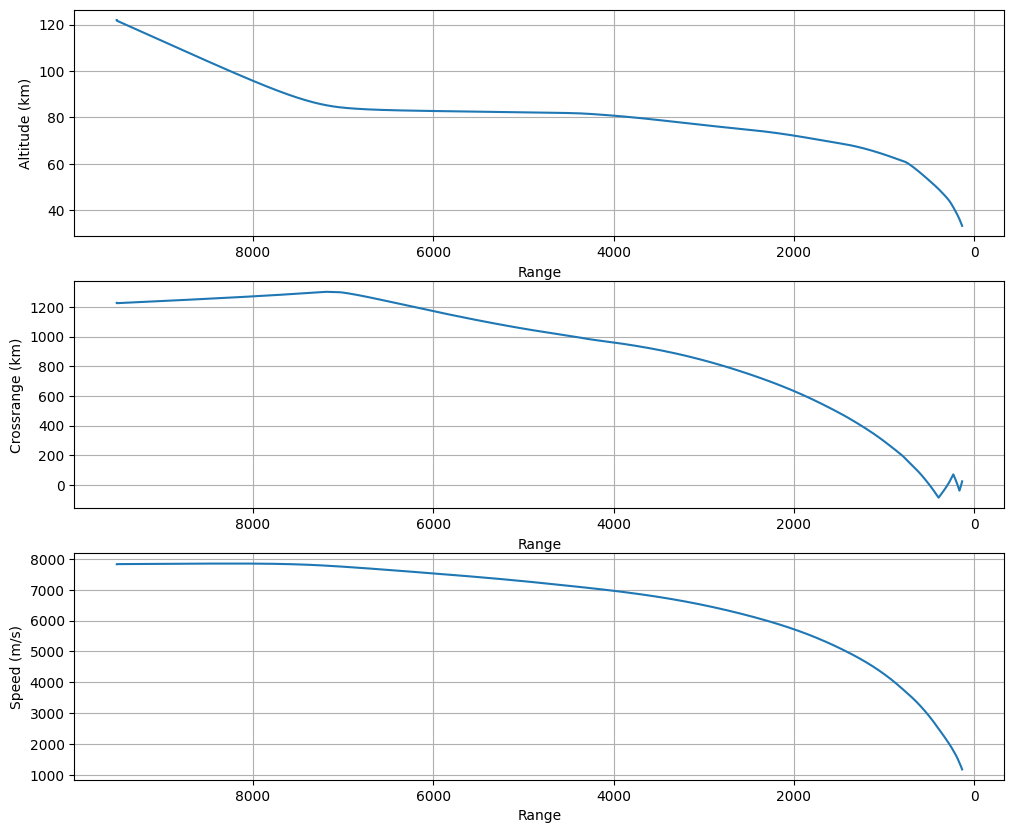

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['range'], data['alt'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Altitude (km)')
plt_.grid()

plt_.invert_xaxis()

sin_B = data['az_err'].apply(lambda az: math.sin(math.radians(az))).to_numpy()
sin_c = data['range'].apply(lambda r : math.sin(r / 6371) ).to_numpy()
xr = np.arcsin(np.multiply(sin_B, sin_c)) * 6371

print(np.min(xr))

plt_ = ax[1]
plt_.plot(
    data['range'], 
    xr
)
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Crossrange (km)')
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[2]
plt_.plot(data['range'], data['speed'])
    
plt_.set_xlabel('Range')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()

plt_.invert_xaxis()




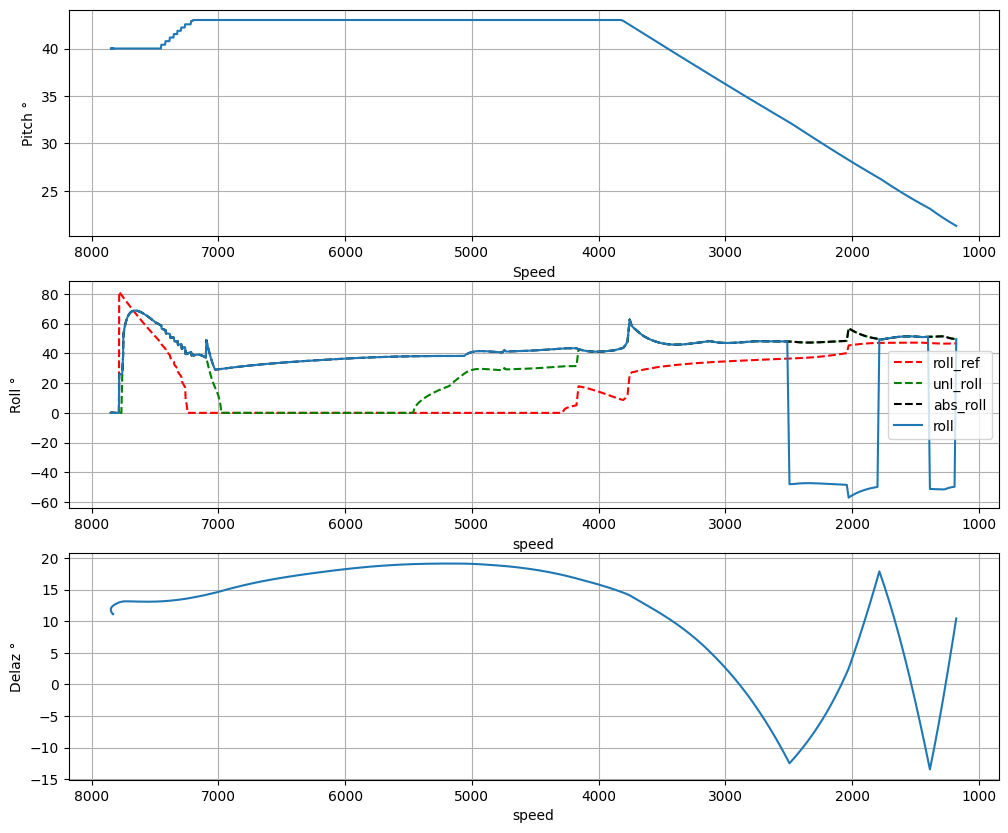

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

plt_ = ax[0]
plt_.plot(data['speed'], data['pitch'])
    
plt_.set_xlabel('Speed')
plt_.set_ylabel('Pitch °')
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[1]

plt_.plot(data['speed'], abs(data['roll_ref']),'--', color='r',label='roll_ref')
plt_.plot(data['speed'], abs(data['unl_roll']),'--', color='g',label='unl_roll')
plt_.plot(data['speed'], abs(data['roll']),'--', color='k',label='abs_roll')
plt_.plot(data['speed'], data['roll'], label='roll')


    
plt_.set_xlabel('speed')
plt_.set_ylabel('Roll °')
plt_.legend()
plt_.grid()

plt_.invert_xaxis()

plt_ = ax[2]

plt_.plot(data['speed'], data['az_err'])


    
plt_.set_xlabel('speed')
plt_.set_ylabel('Delaz °')
plt_.grid()

plt_.invert_xaxis()

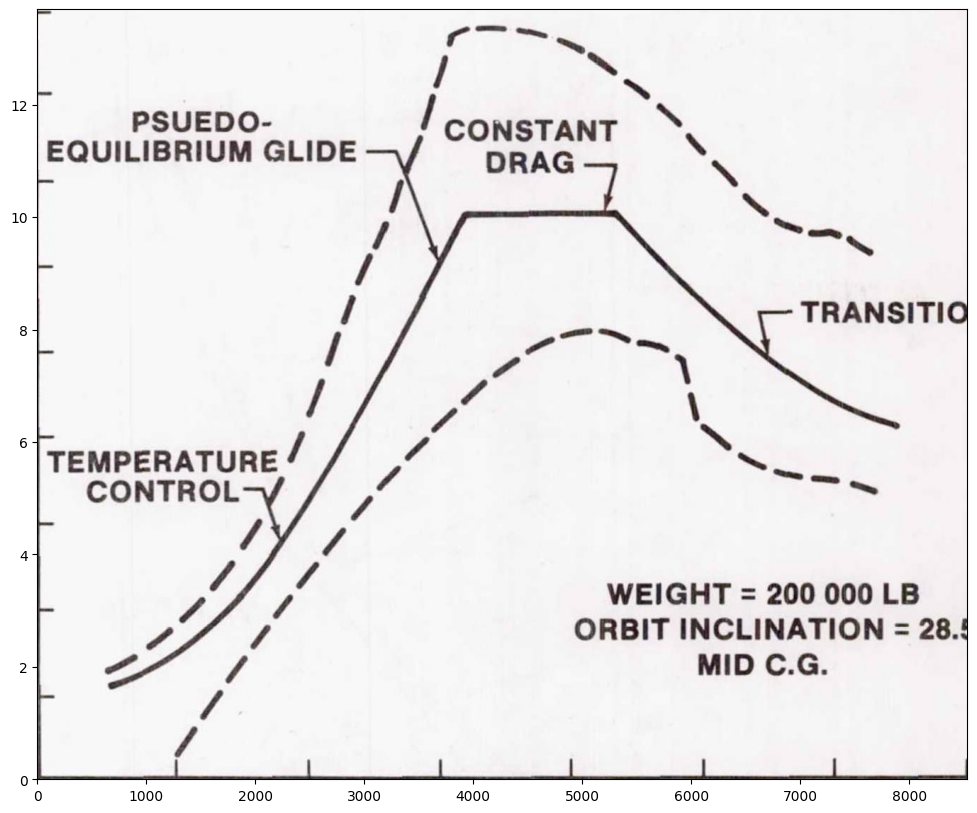

In [48]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

plt_ = ax

img = plt.imread("DESCENT GUIDANCE AND MISSION PLANNING FOR SPACE SHUTTLE-8.jpg")
plt_.imshow(img, aspect='auto', extent=[0, 8534, 0, 13.7])

#ax.set_xlim(8534, 0)
#ax.set_ylim(0, 13.7)


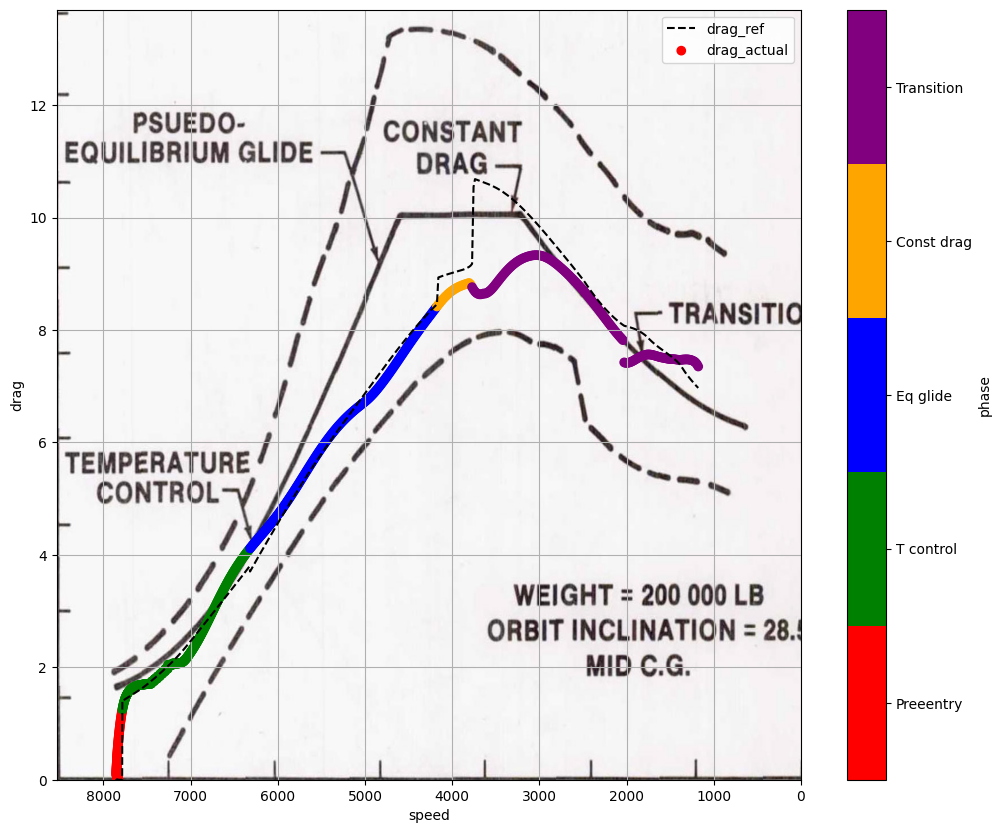

In [51]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

plt_ = ax

img = plt.imread("DESCENT GUIDANCE AND MISSION PLANNING FOR SPACE SHUTTLE-8.jpg")
plt_.imshow(img, aspect='auto', extent=[8534, 0, 0, 13.7])

plt_.plot(data['speed'], data['drag_ref'],'--', color='k',label='drag_ref')

colors = data['entry_phase']

color_map = ListedColormap(['red', 'green', 'blue', 'orange', 'purple'])

# Plotting
plt.scatter(data['speed'], data['drag'], c=colors, cmap=color_map, label='drag_actual')

# Adding colorbar
cbar = plt.colorbar(ticks=[1.4, 2.2, 3.0, 3.8, 4.6])
cbar.ax.set_yticklabels(['Preeentry', 'T control', 'Eq glide', 'Const drag', 'Transition'])
cbar.set_label('phase')



plt_.set_xlabel('speed')
plt_.set_ylabel('drag')
plt_.legend()
plt_.grid()

#plt_.invert_xaxis()

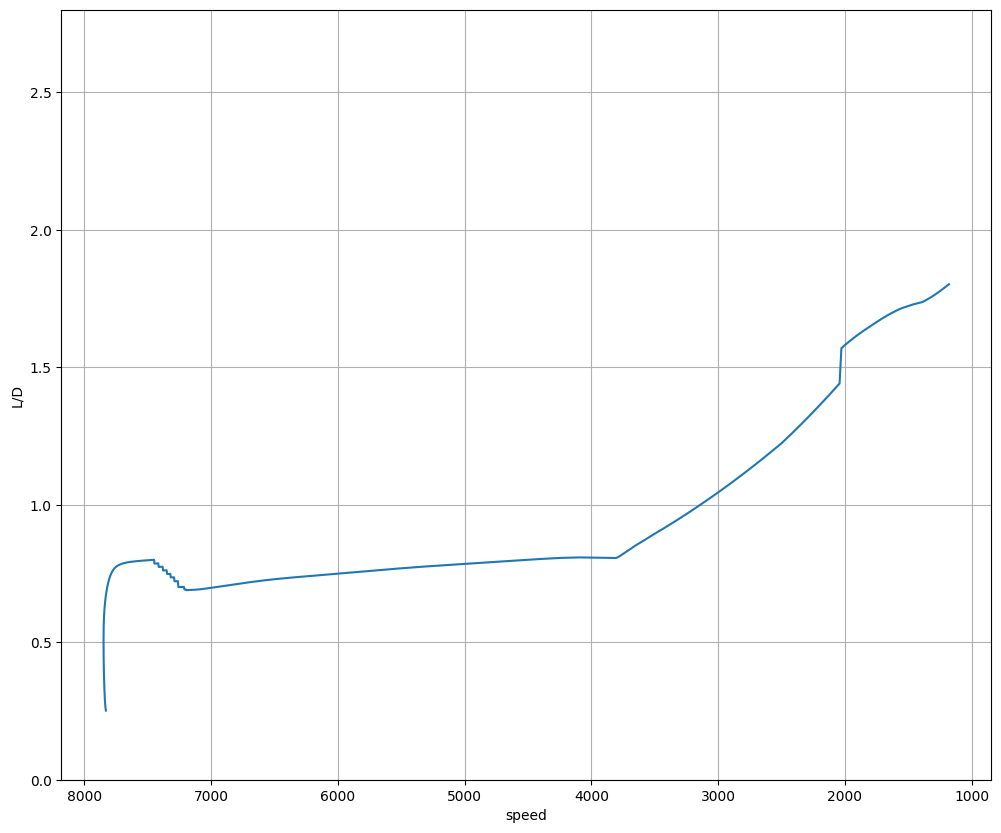

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

plt_ = ax
plt_.plot(data['speed'], data['l_d'])
    
plt_.set_xlabel('speed')
plt_.set_ylabel('L/D')
plt_.grid()

plt.ylim([0, 2.8])

plt_.invert_xaxis()
